# Title

**Exercise: 1 - Hypothesis testing**

# Description

The goal of this exercise is to identify the relevant features of the dataset using **Hypothesis testing** and plotting a bar plot like the one below:

<img src="img/h_testing.png" style="width: 500px;">

# Instructions:
- What we have done for you. Quickly review and observe the distributions of the coefficients:
- Read the file Advertising.csv as a dataframe.
- Fit a simple multi-linear regression with "medv" as the response variable and the remaining columns as the predictor variables.
- Compute the coefficients of the model and plot a bar chart to depict these values.
- To find the distributions of the coefficients 

# Your task:
- Perform bootstrap.
- For each bootstrap:
    - Fit a simple multi-linear regression with the same conditions as before.
    - Compute the coefficient values and store as a list.
- Compute the ∣t∣ values for each of the coefficient value in the list.
- Plot a bar chart of the varying ∣t∣ values.
- Compute the p-value from the ∣t∣ values.
- Plot a bar chart of 1−p values of the coefficients. Also mark the 0.95 line on the chart as shown above.


# Hints:
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html" target="_blank">sklearn.preprocessing.normalize()</a> : Scales input vectors individually to unit norm (vector length).

<a href="https://numpy.org/doc/stable/reference/generated/numpy.interp.html" target="_blank">np.interp()</a> : Returns one-dimensional linear interpolation

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html" target="_blank">df.sample()</a> : Get a new sample from a dataframe

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a> : LinearRegression fits a linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a> : Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the linear model.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html" target="_blank">scipy.stats.t()</a> : A Student’s t continuous random variable.

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [38]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

In [39]:
# Read the file "Advertising.csv" as a dataframe

df = pd.read_csv("data/advertising.csv")
df = df.drop(['Unnamed: 0'], axis=1)
#df = df.drop(['Radio'],axis=1)
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [40]:
# Select a subdataframe of predictors

X = df.drop(['Sales'],axis=1)

# Select the response variable

y = df['Sales']


print(X)


        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [41]:
#Fit a linear regression model, make sure to set normalize=True

#lreg = LinearRegression(normalize=True)
lreg = LinearRegression()

lreg.fit(X, y)

LinearRegression()

In [42]:
coef_dict = dict(zip(df.columns[:-1], np.transpose(lreg.coef_)))
predictors,coefficients = list(zip(*sorted(coef_dict.items(),key=lambda x: x[1])))

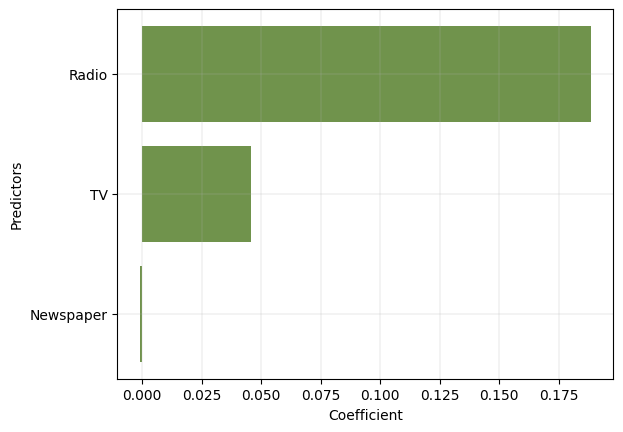

In [43]:
# Use the helper code below to visualise your coefficients

fig, ax = plt.subplots()
ax.barh(predictors,coefficients, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
plt.show()

In [44]:
# Helper function
# t statistic calculator
def get_t(arr):
    means = np.abs(arr.mean(axis=0))
    stds = arr.std(axis=0)
    return np.divide(means,stds)#,where=stds!=0)

In [45]:
# We now bootstrap for numboot times to find the distribution for the coefficients
coef_dist = []
numboot = 1000
for i in range(numboot):
    # This is another way of making a bootstrap using df.sample method. 
    # Take frac=1 and replace=True to get a bootstrap.
    df_new = df.sample(frac=1,replace=True)
    
    X = df_new.drop(['Sales'],axis=1)
    y = df_new[['Sales']]
    
    # Don't forget to normalize
    #lreg = LinearRegression(normalize=True)
    lreg = LinearRegression()
    lreg.fit(X, y)
    coef_dist.append(lreg.coef_)

coef_dist = np.array(coef_dist)

In [46]:
# We use the helper function from above to find the T-test values

tt = get_t(coef_dist)
n = df.shape[0]

print(df.columns[:-1])

Index(['TV', 'Radio', 'Newspaper'], dtype='object')


In [47]:
tt_dict = dict(zip(df.columns[:-1], tt[0]))
predictors, tvalues = list(zip(*sorted(tt_dict.items(),key=lambda x:x[1])))

# Convert tvalues to numpy array
tvalues = np.array(tvalues)

print(tt_dict, "\n\n", tvalues)


{'TV': 24.22604596486205, 'Radio': 17.54624641164147, 'Newspaper': 0.14345258274497968} 

 [ 0.14345258 17.54624641 24.22604596]


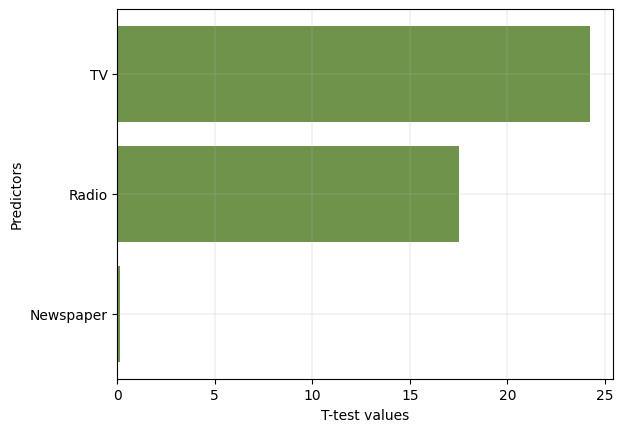

In [48]:
# Use the helper code below to visualise your coefficients
fig, ax = plt.subplots()
ax.barh(predictors,tvalues, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("T-test values")
ax.set_ylabel("Predictors")
plt.show()

In [53]:
### edTest(test_conf) ###
# We now go from t-test values to p values using scipy.stats T-distribution function

pval = stats.t.sf(tt, n-1)*2

# here we use sf i.e 'Survival function' which is 1 - CDF of the t distribution.
# We also multiply by two because its a two tailed test.
# Please refer to lecture notes for more information

# Since p values are in reversed order, we find the 'confidence' which is 1-p

conf = 1-pval

print

[1.         1.         0.11392209]


In [50]:
conf_dict = dict(zip(df.columns[:-1], conf[0]))
predictors, confs = list(zip(*sorted(conf_dict.items(),key=lambda x:x[1])))

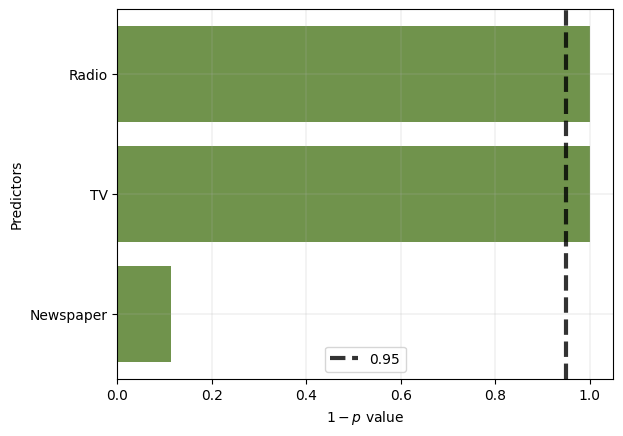

In [51]:
# Use the helper code below to visualise your coefficients
fig, ax = plt.subplots()

ax.barh(predictors,confs, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.axvline(x=0.95,linewidth=3,linestyle='--', color = 'black',alpha=0.8,label = '0.95')
ax.set_xlabel("$1-p$ value")
ax.set_ylabel("Predictors")
ax.legend()
plt.show()

## Relevance of predictors

You may have observed above that `TV` and `radio` are significant but `newspaper` advertising is not.
Re-run the entire exercise but drop `radio` from the analysis by using the following snippet.

```
df = df.drop(['radio'],axis=1)
```

Is `newspaper` still irrelevant by your analysis? Why? or why not?